*italicized text*# Graph Data Analytics

In [ ]:
#!conda install networkx --yes

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph() # type: ignore
print(nx.number_of_nodes(G)) # type: ignore
print(nx.number_of_edges(G)) # type: ignore
print(nx.average_degree_connectivity(G)) # type: ignore

34
78
{16: 4.3125, 9: 5.777777777777778, 10: 6.6, 6: 8.333333333333334, 3: 8.222222222222221, 4: 8.541666666666666, 5: 10.466666666666667, 2: 12.409090909090908, 1: 16.0, 12: 5.083333333333333, 17: 3.823529411764706}


### Calculate page rank by using simple degree centrality

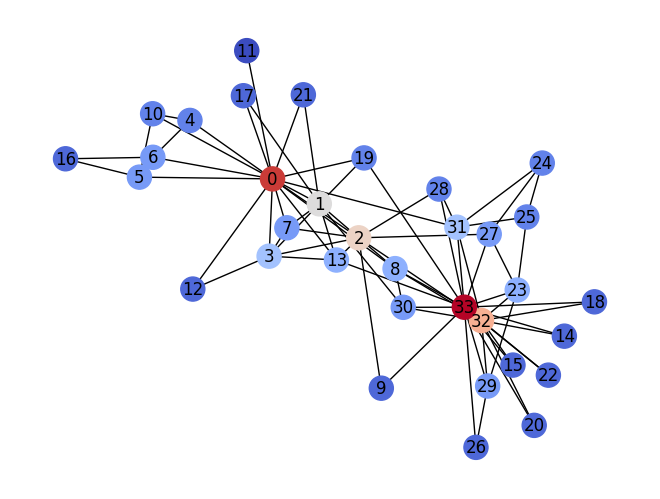

In [10]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


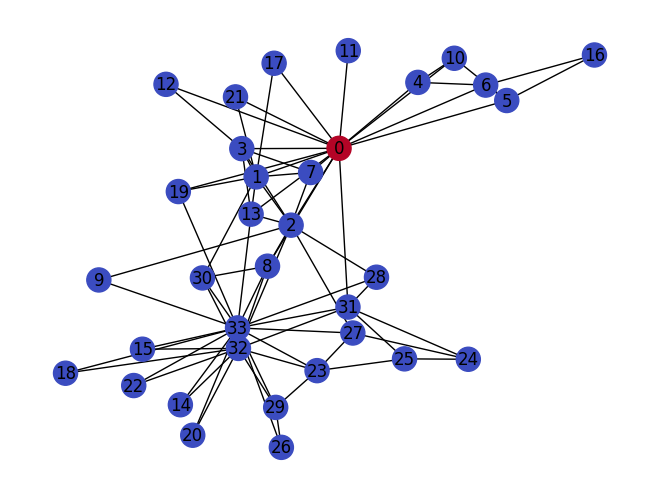

In [11]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [12]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.number_of_nodes(G)) # type: ignore
print(nx.number_of_edges(G)) # type: ignore
print(nx.average_degree_connectivity(G)) # type: ignore
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.number_of_nodes(G1)) # type: ignore
print(nx.number_of_edges(G1)) # type: ignore
print(nx.average_degree_connectivity(G1)) # type: ignore

6175
15969
{139: 8.467625899280575, 2: 34.538492063492065, 5: 33.91750972762646, 8: 32.10176991150443, 4: 34.4577205882353, 6: 33.50757575757576, 9: 33.867063492063494, 23: 20.41449275362319, 14: 29.31081081081081, 59: 12.384180790960452, 3: 34.75072463768116, 67: 11.582089552238806, 1: 32.5159837910851, 10: 32.037333333333336, 24: 11.951923076923077, 55: 10.381818181818181, 17: 22.61512605042017, 22: 18.18421052631579, 54: 10.555555555555555, 13: 25.912087912087912, 29: 14.155172413793103, 15: 27.574603174603176, 7: 34.13361344537815, 85: 6.988235294117647, 32: 9.618055555555555, 11: 29.402097902097903, 21: 16.50793650793651, 19: 19.126644736842106, 71: 10.126760563380282, 44: 13.93560606060606, 47: 10.735224586288416, 131: 12.198473282442748, 155: 9.683870967741935, 58: 13.172413793103448, 49: 17.632653061224488, 30: 12.979166666666666, 28: 14.239795918367347, 57: 7.333333333333333, 172: 13.063953488372093, 20: 16.70909090909091, 33: 19.767676767676768, 25: 13.895384615384616, 38: 11

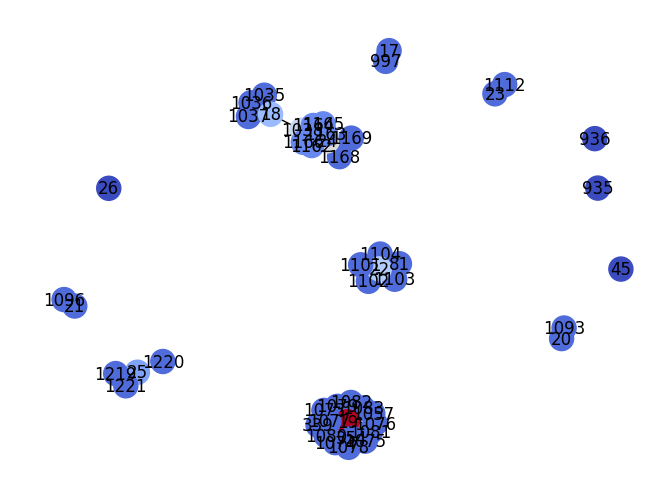

In [13]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


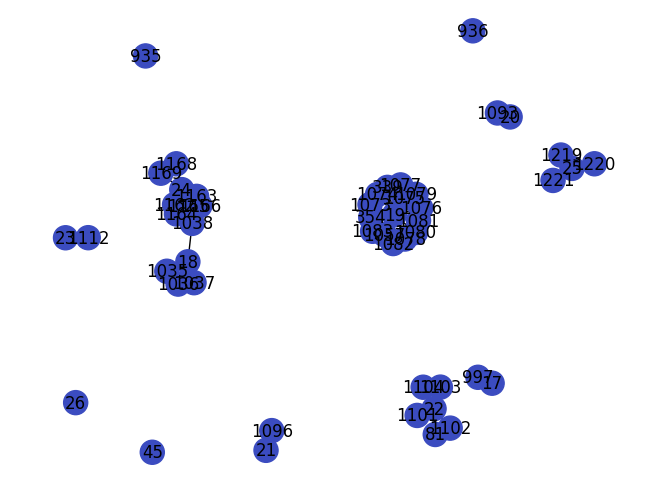

In [14]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)